<a href="https://colab.research.google.com/github/Manikanta-204/Play-store-app-review-analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>


*  1) Data wrangling on main dataset

*  2) Data analysis and visulization
*  3) Data wrangling on user reviews dataset 
*  4) Merged of main dataset and user reviews dataset for analysis 




In [3]:
# Import numpy and pandas packages for the data analysis purpose
import numpy as np
import pandas as pd
# Import matplotlib and seaborn packages for the data visualization purpose
import matplotlib.pyplot as plt             # pyplot is a module
import seaborn as sns


In [4]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Define the path where data is kept
file_path = '/content/drive/MyDrive/Colab Notebooks/Play store app review analysis EDA Capstone project/Play Store Data.csv'

#1) Data Wrangling on main dataset

In [6]:
# Reading the csv format dataset
playstore_app_df = pd.read_csv(file_path)

In [7]:
# Checking the number of rows and columns in the playstore app dataset
playstore_app_df.shape

(10841, 13)

There are total 10841 rows and 13 columns are present in the playstore app 
dataset

In [8]:
# print the first 5 records in dataset
playstore_app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
# printing the last 5 records from playstore app dataset
playstore_app_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [10]:
# Checking the what are the coulumns names that are present in the dataset
playstore_app_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [11]:
# Get the information about our playstore app dataset
playstore_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


It displays the total number of rows and columns, Datatypes of each column and memory requirement

In [12]:
# By default describe method displays the statistics of numerical columns 
playstore_app_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [13]:
# Checking the  null values if those are present in our dataset
playstore_app_df.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In Rating column 1474 null values are identified and some other columns have less number of  null values compared to rating

In [14]:
#shape of the dataset before droping the records 
playstore_app_df.shape

(10841, 13)

In [15]:
# Removing the null values 

# playstore_app_df.dropna(how = 'any',axis=0,inplace = True)    
# If we use above code we can remove all null values but we can remove only maximum null value column present in our dataset 

playstore_app_df.dropna(how = 'any' ,subset= ['Rating'],axis=0,inplace = True)


In [16]:
# verifying for rating null values 
playstore_app_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

Now Rating column has no null values and let's handle other null values

In [17]:
# shape of the dataset after droping null values
playstore_app_df.shape

(9367, 13)

our data set has 9367 rows and 13 columns

In [18]:
# We can replace minimum amount of null values with most common repeated values that are present in the same column 
playstore_app_df['Current Ver'].fillna(playstore_app_df['Current Ver'].mode()[0],inplace = True)
playstore_app_df['Android Ver'].fillna(playstore_app_df['Android Ver'].mode()[0],inplace = True)

Instead of droping null values we can also replace null with most common repeated value that are present in same column

In [19]:
# Verifying other null values
playstore_app_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [20]:
playstore_app_df['Content Rating'].fillna(playstore_app_df['Content Rating'].mode()[0],inplace = True)

In [21]:
# checking null values
playstore_app_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Now we don't have any null values in our dataset

In [22]:
# Final Shape of playstore app dataset
playstore_app_df.shape

(9367, 13)

In [23]:
#  Checking unique values 
playstore_app_df['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Fr. Mike Schmitz Audio Teachings',
       'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [24]:
playstore_app_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In the above result there is a inordered data was present that is category has 1.9 value it is not a category it is belongs to rating so we can arrange the data in correct order position corresponding to column

In [25]:
#For getting the inordered record we can use comparision operator 
playstore_app_df[playstore_app_df['Category']== '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


Note: only boolean values are return by using comparision opeartor 




In the above record data is not in proper format it has some uneven characters are present so we need to modify it

In [26]:
# we can shift category value with null for getting correct position data
playstore_app_df.loc[10472] = playstore_app_df.loc[10472].shift()
playstore_app_df['App'].loc[10472] = playstore_app_df['Category'].loc[10472]
playstore_app_df['Category'].loc[10472] = np.nan 
playstore_app_df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                           Everyone
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [27]:
# Replacing null value with common repeated value
playstore_app_df['Category'].fillna(playstore_app_df['Category'].mode()[0],inplace= True)
playstore_app_df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                           FAMILY
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                           Everyone
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [28]:
#checking rating unique values
playstore_app_df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8, 2.7,
       1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2,
       '1.9'], dtype=object)

In the above result instead of float data type it has object data type and one string value was present so we need to handle this

In [29]:
# Converting object datatype to numeric 
playstore_app_df['Rating'] = pd.to_numeric(playstore_app_df['Rating'],errors ='coerce')
playstore_app_df['Rating'].dtype

dtype('float64')

In [30]:
# Checking Reviews uinque values
playstore_app_df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

Some of reviews are in million format and some of are in 0.0 format and data type is also object so we should arrange in proper fromat

In [31]:
playstore_app_df[playstore_app_df['Reviews']=='3.0M']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [32]:
# By using replace method we can arrange in proper format
playstore_app_df['Reviews'] = playstore_app_df.Reviews.replace('0.0',0)
playstore_app_df['Reviews'] = playstore_app_df.Reviews.replace('3.0M',3000000.0)
playstore_app_df['Reviews'] = playstore_app_df['Reviews'].astype(float)
playstore_app_df['Reviews'].dtype

dtype('float64')

In [33]:
# checking size unique values
playstore_app_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

There are some erros in above result it has a string value instead of kilo or megabyte and data type is object

In the above result some of sizes are in kilobyte format and some of are in megabyte format so we can arrange in one form that is in kilobyte format

In [34]:
# By using replcae pandas method we can arrange the data
playstore_app_df['Size'] = playstore_app_df.Size.replace("Varies with device",np.nan)
playstore_app_df['Size'] = playstore_app_df.Size.str.replace("M","000") # All size values became the kilobyte type.
playstore_app_df['Size'] = playstore_app_df.Size.str.replace("k","")
playstore_app_df['Size'] = playstore_app_df.Size.replace("1,000+",1000)
playstore_app_df['Size'] =playstore_app_df['Size'].astype(float)
playstore_app_df['Size'].dtype

dtype('float64')

In [35]:
# print the size values
playstore_app_df['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10834        2.6
10836    53000.0
10837        3.6
10839        NaN
10840    19000.0
Name: Size, Length: 9367, dtype: float64

See in the  above result there is a null value is refleceted 

In [36]:
# Checking install unique values
playstore_app_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In the above result it has wrong datatype and trailing edge has + symbols and commas

In [37]:
# By using anonymous lambda function we can perform 
playstore_app_df['Installs']= playstore_app_df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
playstore_app_df['Installs']= playstore_app_df['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))


In [38]:
# converting data type into int
playstore_app_df['Installs'] = pd.to_numeric(playstore_app_df['Installs'])
playstore_app_df['Installs'] = playstore_app_df['Installs'].astype('int')
playstore_app_df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9367, dtype: int64

In [39]:
# Checking price unique values
playstore_app_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In the above result trailing edge has $ dollar special characters were present and wrong data type 

In [40]:
# By using for loop we can remove $ becuase for loop is used for defnite iterations
price = []
for i in playstore_app_df['Price']:
    if i[0]=='$':
        price.append(i[1:])
    else:
        price.append(i)  


In [41]:
# droping string price value
playstore_app_df.drop(labels=playstore_app_df[playstore_app_df['Price']=='Everyone'].index, inplace = True)
# asining the price list values in data frame
playstore_app_df['Price']= price

# converting data type into float
playstore_app_df['Price']= playstore_app_df['Price'].astype('float')


In [42]:
#Checking price unique values
playstore_app_df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [43]:
# Checking the last update unique values
playstore_app_df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [44]:
# Converting data type into data format
playstore_app_df['Last Updated'] = pd.to_datetime(playstore_app_df['Last Updated'])
print(playstore_app_df['Last Updated'])

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10834   2017-06-18
10836   2017-07-25
10837   2018-07-06
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 9367, dtype: datetime64[ns]


In [45]:
# checking Genres unique values
playstore_app_df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [46]:
# Checking content rating unique values
playstore_app_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [47]:
# Checking current version unique values
playstore_app_df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.5.447', '1.0.612928', '0.3.4'],
      dtype=object)

In [48]:
# Checking Similar Apps count
app_list = playstore_app_df['App'].value_counts().head()
ap = app_list
ap

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
Name: App, dtype: int64

In [49]:
# Checking Maximum installs value
playstore_app_df['Installs'].max()

1000000000

In [50]:
# Checking Maximum vaules in each column
playstore_app_df.max(axis=0)

App               🔥 Football Wallpapers 4K | Full HD Backgrounds 😍
Category                                                   WEATHER
Rating                                                         5.0
Reviews                                                 78158306.0
Size                                                      100000.0
Installs                                                1000000000
Type                                                          Paid
Price                                                        400.0
Content Rating                                             Unrated
Genres                                                        Word
Last Updated                                   2018-08-08 00:00:00
Current Ver                                          version 0.994
Android Ver                                     Varies with device
dtype: object

In [51]:
# Creating dataframe
category_values = playstore_app_df['Category']
install_values = playstore_app_df['Installs']
category_df = pd.DataFrame({"category":category_values,"installs":install_values})
# Sorting installs values in descending order
install_category_df= category_df.sort_values(by='installs',ascending=False)
install_category_df

,category,installs
3816,NEWS_AND_MAGAZINES,1000000000
3996,COMMUNICATION,1000000000
451,COMMUNICATION,1000000000
3117,TRAVEL_AND_LOCAL,1000000000
9844,NEWS_AND_MAGAZINES,1000000000
...,...,...
10562,SPORTS,5
7147,SOCIAL,5
2454,MEDICAL,1
5917,GAME,1


#2) Data analysis and visulization

Text(0.5, 1.0, 'Category vs Installs')

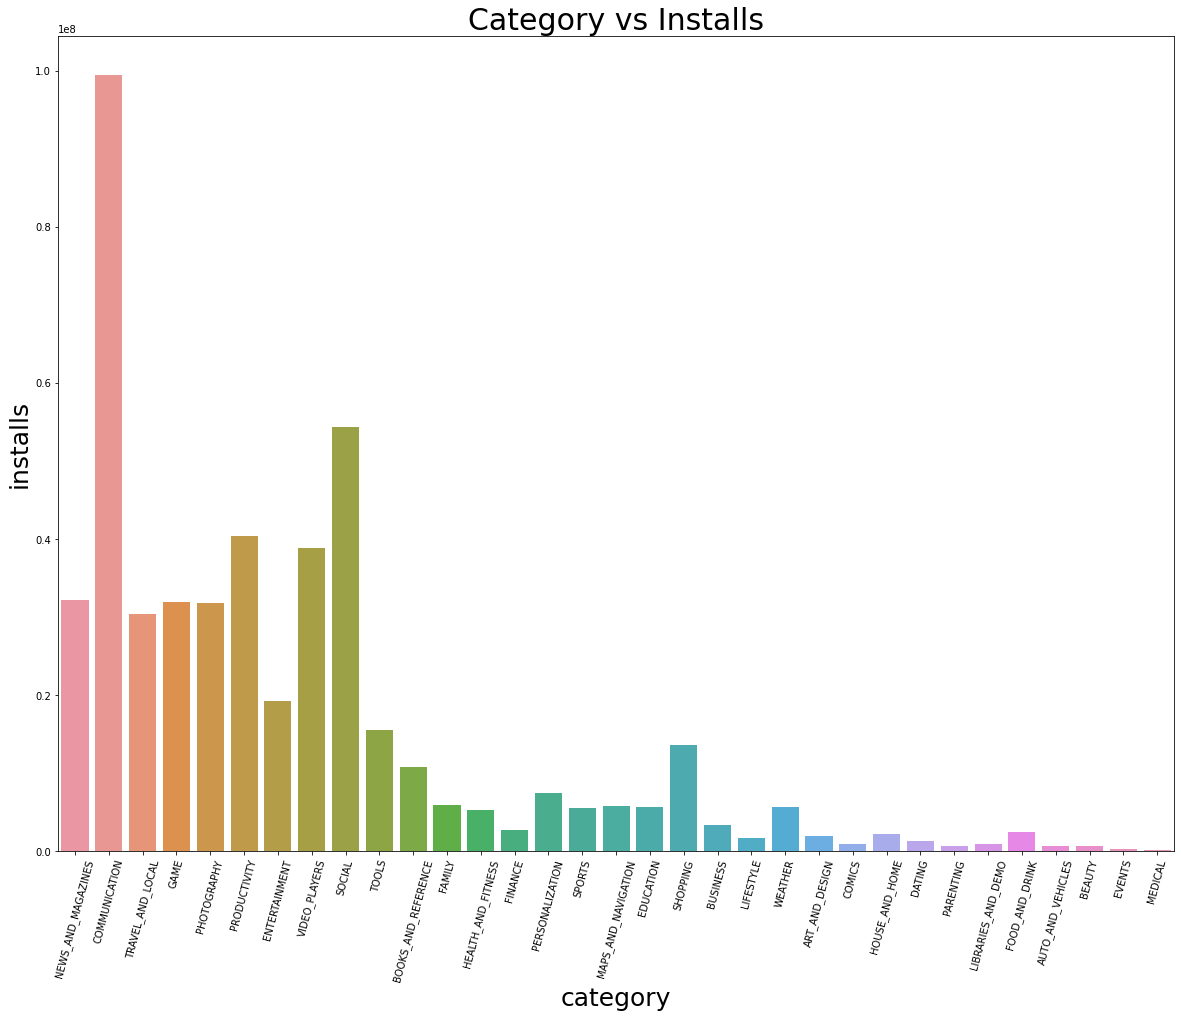

In [52]:
# Plotting Barplot graph between category and installs
plt.rcParams['figure.figsize'] = (20,15)
sns.barplot(x = 'category',y='installs',data = install_category_df,ci=None)
plt.xlabel("category",size=25)
plt.ylabel("installs",size=25)
plt.xticks(rotation = 75)
plt.title("Category vs Installs",size=30)



In [53]:
# Sorting installs by ascending order
category_df.sort_values('installs')

,category,installs
5917,GAME,1
2454,MEDICAL,1
10697,GAME,1
7147,SOCIAL,5
2484,MEDICAL,5
...,...,...
2554,SOCIAL,1000000000
3943,SOCIAL,1000000000
4098,TRAVEL_AND_LOCAL,1000000000
1700,GAME,1000000000


In [54]:
# Creating dataframe 
cat_rev_df = pd.DataFrame({"category":playstore_app_df['Category'],"Reviews":playstore_app_df['Reviews']})
# sorting reviews in descending order
new_cat_rev_df = cat_rev_df.sort_values(by='Reviews',ascending=False)
new_cat_rev_df

,category,Reviews
2544,SOCIAL,78158306.0
3943,SOCIAL,78128208.0
381,COMMUNICATION,69119316.0
336,COMMUNICATION,69119316.0
3904,COMMUNICATION,69109672.0
...,...,...
9810,PRODUCTIVITY,1.0
8379,TOOLS,1.0
7806,BUSINESS,1.0
4477,PERSONALIZATION,1.0


Text(0.5, 1.0, 'Category vs Reviews')

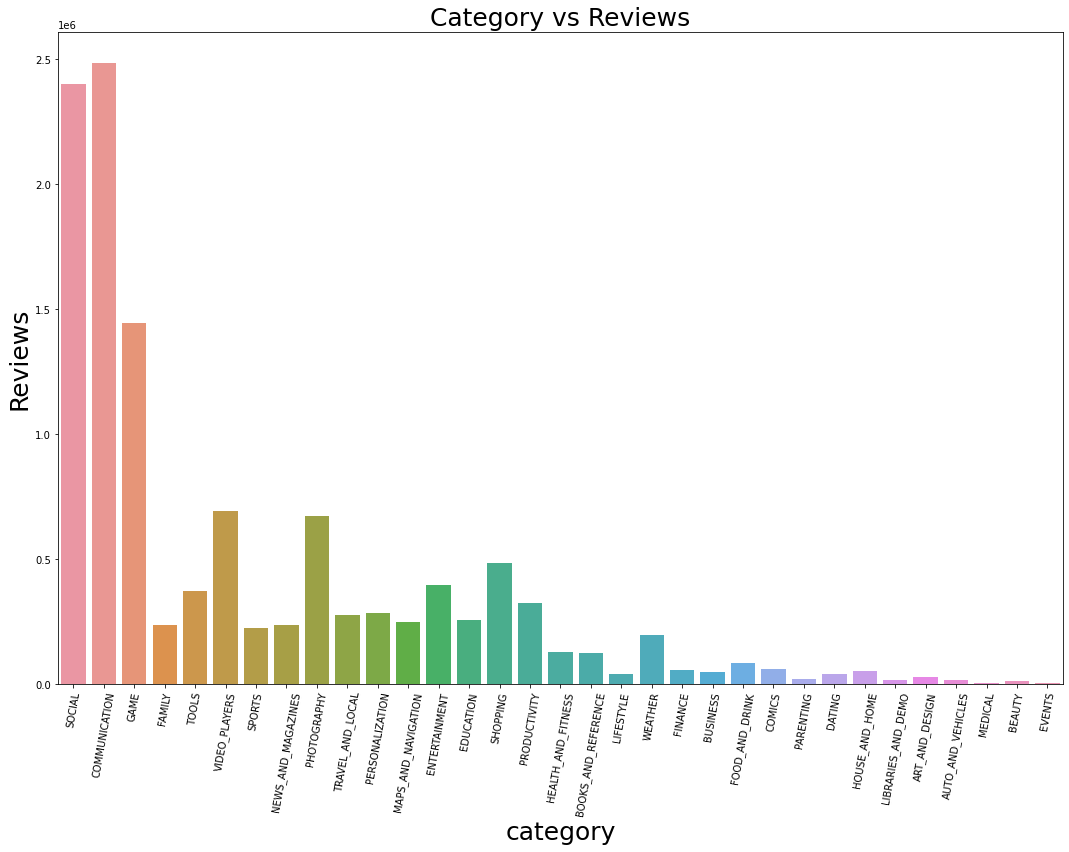

In [55]:
# Plotting barplot graph between category and reviews
plt.rcParams['figure.figsize'] = (18,12)
sns.barplot(x="category",y="Reviews",data=new_cat_rev_df,ci = None)
plt.xlabel("category",size=25)
plt.ylabel("Reviews",size=25)
plt.xticks(rotation=80)
plt.title("Category vs Reviews",size=25)

In [56]:
#Creating dataframe
rat_cat_df = pd.DataFrame({"Category":playstore_app_df['Category'],"Rating":playstore_app_df['Rating']})

#Sorting rating values in descending order
new_ratcat_df = rat_cat_df.sort_values(by='Rating',ascending=False)
new_ratcat_df

,Category,Rating
9056,GAME,5.0
8395,NEWS_AND_MAGAZINES,5.0
8493,FAMILY,5.0
6330,FAMILY,5.0
6342,BUSINESS,5.0
...,...,...
8820,TOOLS,1.0
7383,PRODUCTIVITY,1.0
4127,FAMILY,1.0
5978,FAMILY,1.0


Text(0.5, 1.0, '5-Star Rating in category wise')

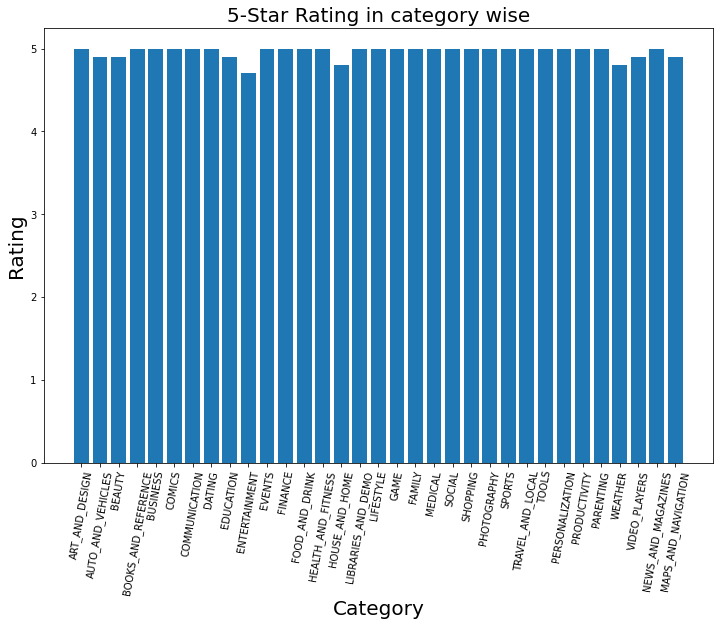

In [57]:
# plotting bar graph between categories and rating
plt.rcParams['figure.figsize'] = (12,8)
plt.bar(playstore_app_df['Category'],playstore_app_df['Rating'])
plt.xticks(rotation=80)
plt.xlabel('Category',size=20)
plt.ylabel('Rating',size=20)
plt.title("5-Star Rating in category wise",size=20)

In [58]:
#Checking rating values in descending order 
new_ratcat_df['Rating']

9056    5.0
8395    5.0
8493    5.0
6330    5.0
6342    5.0
       ... 
8820    1.0
7383    1.0
4127    1.0
5978    1.0
7926    1.0
Name: Rating, Length: 9367, dtype: float64

In [59]:
# we can use Heat Map for checking correlation between columns
correlation_df=playstore_app_df.corr()
correlation_df

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068147,0.082495,0.051393,-0.021851
Reviews,0.068147,1.000000,0.236351,0.641613,-0.009819
Size,0.082495,0.236351,1.000000,0.163031,-0.026107
Installs,0.051393,0.641613,0.163031,1.000000,-0.011889
Price,-0.021851,-0.009819,-0.026107,-0.011889,1.000000


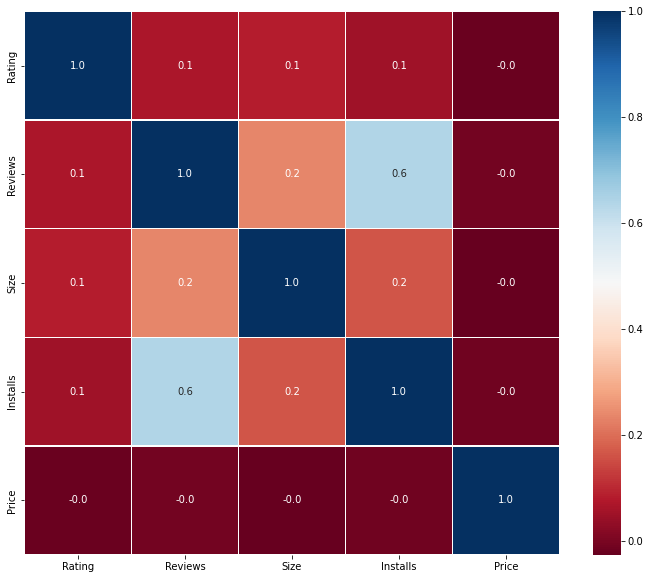

In [60]:
# Plotting heatmap for numerical columns
fig,axes = plt.subplots(figsize=(12,10))
sns.heatmap(correlation_df,cmap = 'RdBu',annot=True , linewidths=.5,fmt='.1f',ax=axes)
plt.show()

In [61]:
playstore_app_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9367.000000,9.367000e+03,7730.000000,9.367000e+03,9367.000000
mean,4.191513,5.139950e+05,21088.523415,1.789553e+07,0.960825
std,0.515735,3.143879e+06,24907.344143,9.123353e+07,15.815743
min,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000
25%,4.000000,1.860000e+02,6.100000,1.000000e+04,0.000000
50%,4.300000,5.928000e+03,14000.000000,5.000000e+05,0.000000
75%,4.500000,8.152250e+04,33000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


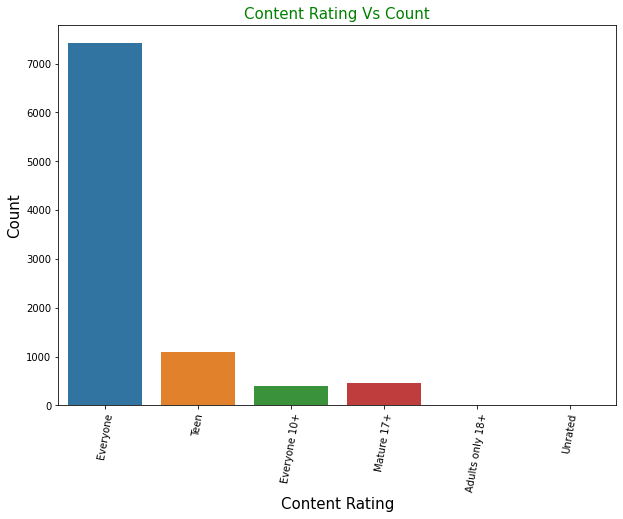

In [62]:
#Plotting countplot graph for content rating visulization
plt.figure(figsize=(10,7))
sns.countplot(data=playstore_app_df, x='Content Rating')
plt.xticks(rotation=80)
plt.title('Content Rating Vs Count',color = 'green',fontsize=15)
plt.xlabel("Content Rating",size=15)
plt.ylabel("Count",size=15)
plt.show()

In the above countplot graph everyone has more content value

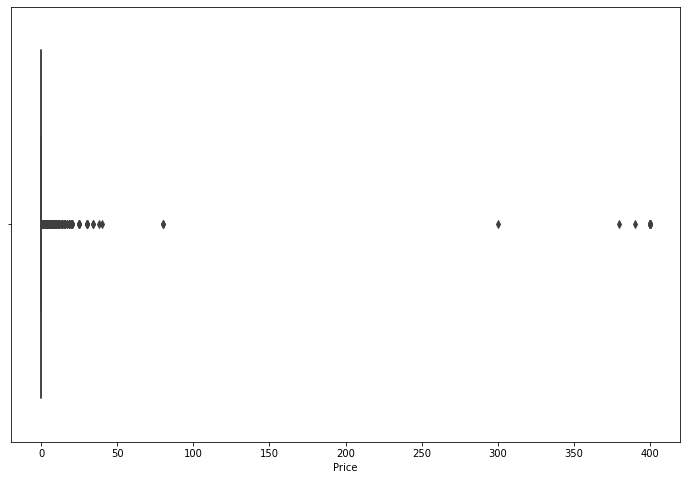

In [63]:
# plotting boxplot for price visualization
sns.boxplot(x=playstore_app_df['Price'])

In the above boxplot greater than 50 price are less and maximum price is 400

Category           Type
ART_AND_DESIGN     Free     59
                   Paid      3
AUTO_AND_VEHICLES  Free     72
                   Paid      1
BEAUTY             Free     42
                          ... 
TRAVEL_AND_LOCAL   Paid      8
VIDEO_PLAYERS      Free    156
                   Paid      4
WEATHER            Free     68
                   Paid      7
Name: Type, Length: 61, dtype: int64


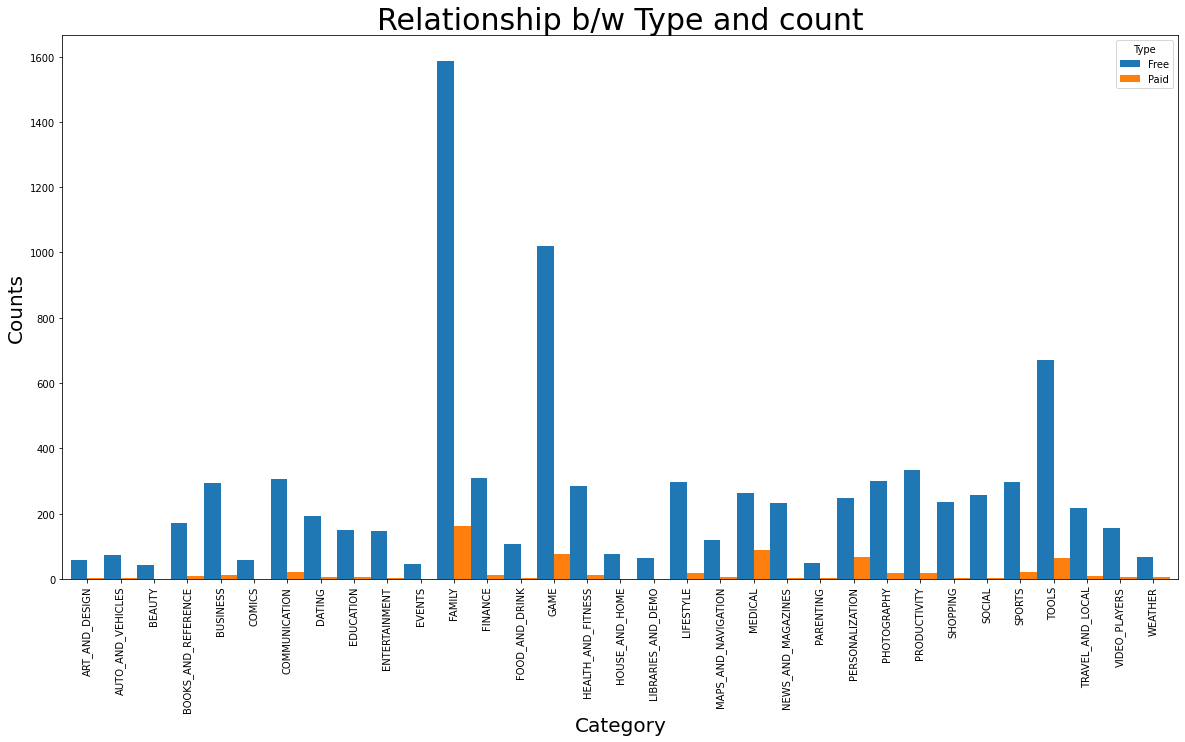

In [64]:
# By using bar graph we can visulize type and count
print(playstore_app_df.groupby('Category')['Type'].value_counts())
Type_cat = playstore_app_df.groupby('Category')['Type'].value_counts().unstack().plot.bar(figsize=(20,10), width=1)
plt.title('Relationship b/w Type and count',size=30)
plt.xlabel('Category',size=20)
plt.ylabel('Counts',size=20)
plt.show()

In the above graph has less paid type compare to free type

In [65]:
#Checking type values
playstore_app_df['Type'].value_counts()

Free    8720
Paid     647
Name: Type, dtype: int64

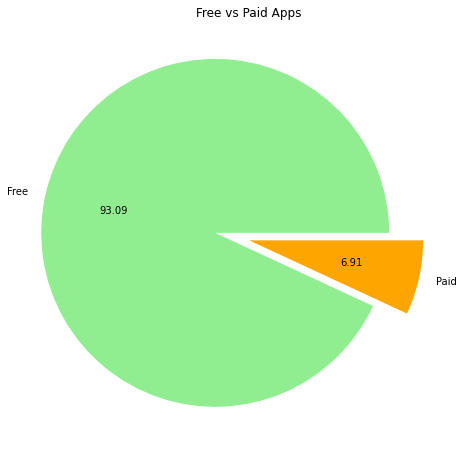

In [66]:
#Plotting pie graph 
plt.subplots(figsize=(12,8))
Free_paid_type = playstore_app_df.groupby('Type').size()
colors = ["lightgreen","orange"]
explode = (0.2,0)
plt.pie(Free_paid_type, explode=explode, colors=colors,labels=['Free','Paid'],autopct='%.2f')
plt.title('Free vs Paid Apps')
plt.show()

In the above result free type are 93.09% and paid type are 6.91%

Category        Android Ver 
ART_AND_DESIGN  4.1 and up      20
                4.0.3 and up    16
                2.3 and up       7
                4.0 and up       7
                4.2 and up       3
                                ..
WEATHER         2.2 and up       2
                4.2 and up       2
                1.6 and up       1
                2.3.3 and up     1
                3.0 and up       1
Name: Android Ver, Length: 501, dtype: int64


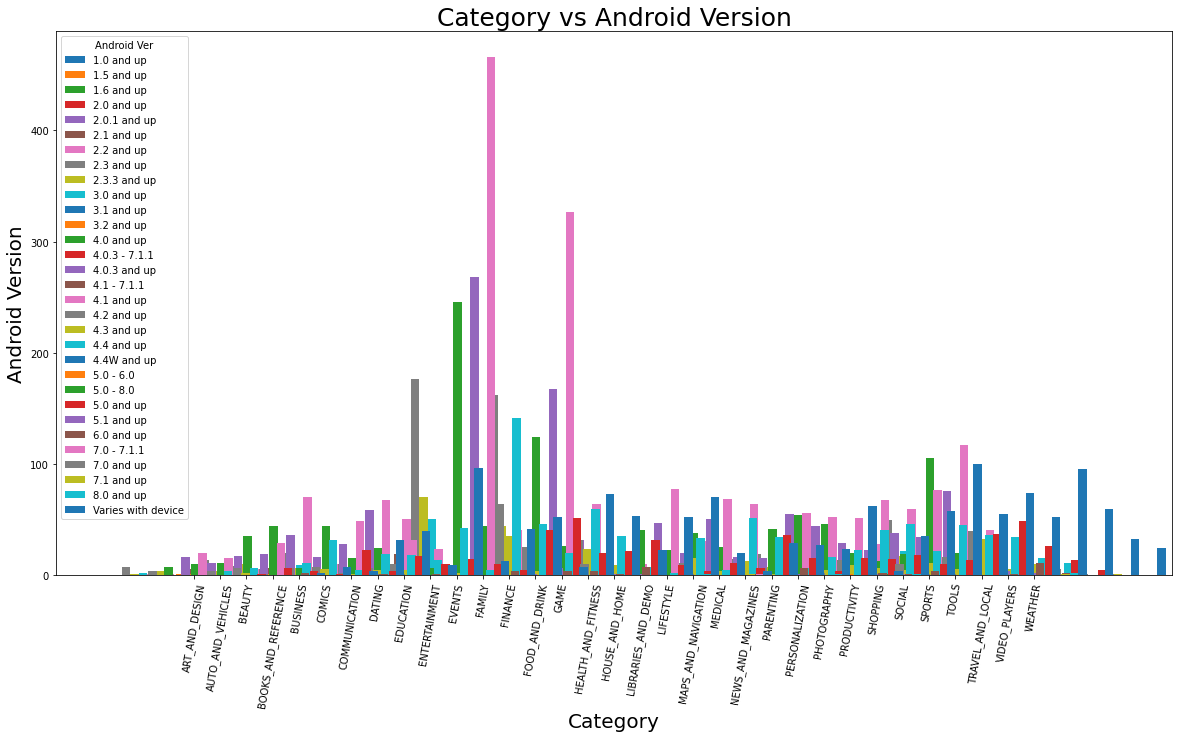

In [67]:
#plotting bar graph for visualization of category and android version
print(playstore_app_df.groupby('Category')['Android Ver'].value_counts())
Type_cat = playstore_app_df.groupby('Category')['Android Ver'].value_counts().unstack().plot.bar(figsize=(20,10), width=10)
plt.title('Category vs Android Version',size=25)
plt.xticks(rotation=80)
plt.xlabel('Category',size=20)
plt.ylabel('Android Version',size=20)
plt.show()

In [68]:
# Checking maxium size of category
playstore_app_df['Size'].max()

100000.0

App                    Bubble Shooter
Category                         GAME
Rating                            4.5
Reviews                      148945.0
Size                          46000.0
Installs                     10000000
Type                             Free
Price                             0.0
Content Rating               Everyone
Genres                         Casual
Last Updated      2018-07-17 00:00:00
Current Ver                    1.20.1
Android Ver              4.0.3 and up
Name: 1875, dtype: object


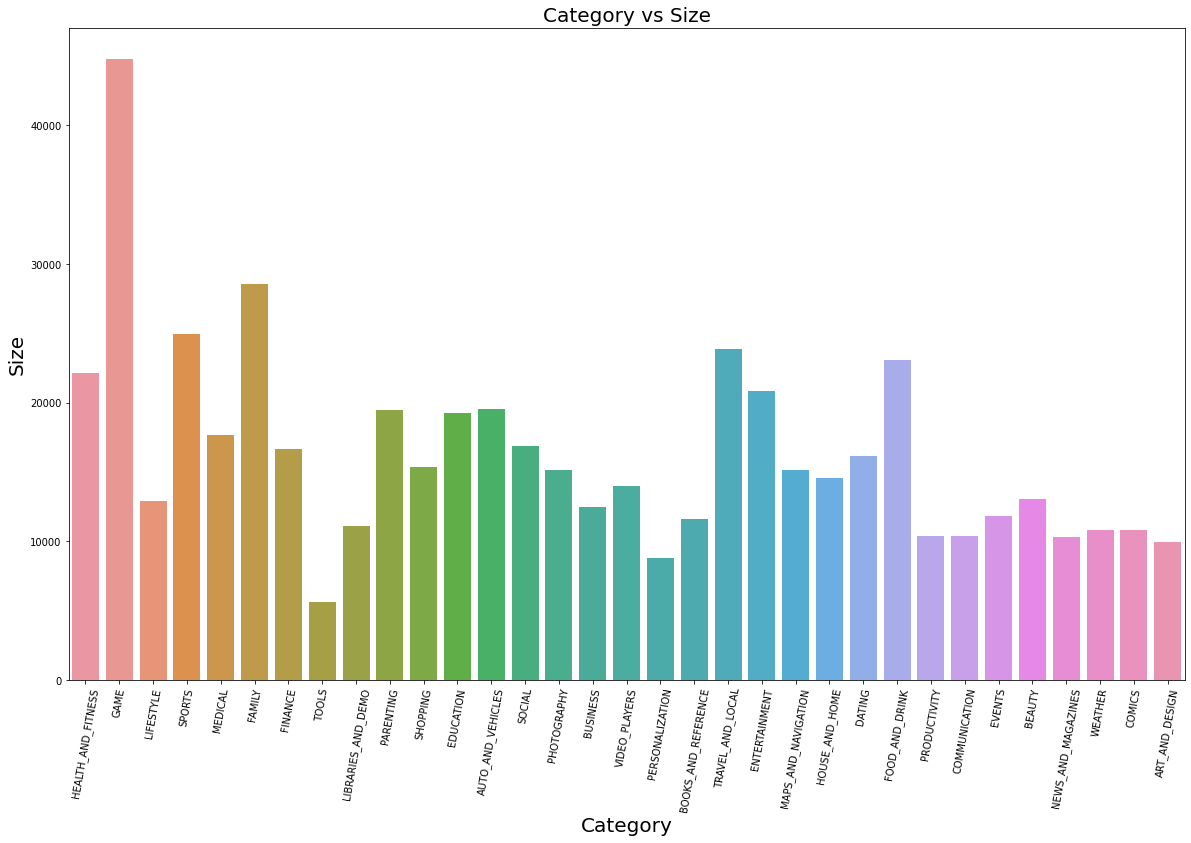

In [69]:
#print(playstore_app_df['Size'].sort_values(ascending=True).head())
print(playstore_app_df.iloc[1793])
plt.figure(figsize=(20,12))
ax = sns.barplot(x="Category",y="Size",data=playstore_app_df.sort_values(by='Size',ascending=False),ci=None)
plt.xticks(rotation=80)
plt.xlabel("Category",size=20)
plt.ylabel("Size",size=20)
plt.title("Category vs Size",size=20)
#ax.set_ylim(0,100000)
plt.show()

#3) Data wrangling on user reviews dataset 

In [70]:
#Reading customer reviews csv type dataset
people_reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Play store app review analysis EDA Capstone project/User Reviews.csv')

In [71]:
#shape of the dataset
people_reviews.shape

(64295, 5)

In [72]:
#printing first five records in our dataset
people_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [73]:
#Checking null values in dataset
people_reviews.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [74]:
#Dropping null values
people_reviews.dropna(how = 'any',subset=['Translated_Review','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity'],axis=0,inplace=True)

In [75]:
#Verifying null values
people_reviews.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

#4) Merged of main dataset and user reviews dataset for analysis 

In [76]:
#merging playstore app dataset and customer reviews dataset 
merged_dataset = pd.merge(people_reviews,playstore_app_df,on = 'App',how='inner')


In [77]:
#Checking null values after merging datasets
merged_dataset.isnull().sum()

App                           0
Translated_Review             0
Sentiment                     0
Sentiment_Polarity            0
Sentiment_Subjectivity        0
Category                      0
Rating                        0
Reviews                       0
Size                      27559
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
dtype: int64

In [78]:
#Replacing null values with most common repeated values by using mode method
merged_dataset['Size'].fillna(merged_dataset['Size'].mode()[0],inplace = True)
merged_dataset.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
dtype: int64

In [79]:
#printing first five records in merged dataset
merged_dataset.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up


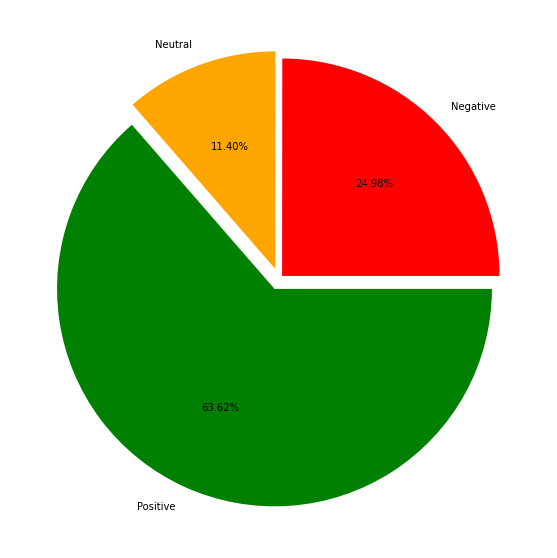

In [80]:
#Pie plot for checking sentiment visualization
plt.subplots(figsize=(12,10))
sentiment = merged_dataset.groupby('Sentiment').size()
sentiment_values = ['Negative','Neutral','Positive']
colors = ["Red","Orange","Green"]
explode = (0.02,0.05,0.05)
plt.pie(sentiment,explode = explode,colors= colors,labels=sentiment_values,autopct='%.2f%%')
plt.show()

user sentiment analysis has 3 categories 1)positive is green colour and its value is 63.62% this value shows us better growth of result

In [81]:
# Shape of merged dataset
merged_dataset.shape

(72566, 17)

#Top five apps installed 

In [82]:
#Checking maximum installation value
merged_dataset['Installs'].max()

1000000000

In [83]:
#Sorting five maximum  installs values in descending order
index = merged_dataset['Installs'].sort_values(ascending=False).head().index


In [84]:
#printing top five apps
merged_dataset.iloc[index]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
66842,Hangouts,This great app. N thank that. But yeah. It iss...,Positive,0.245833,0.500000,COMMUNICATION,4.0,3419513.0,97000.0,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device
63608,Google Photos,When I bought Android phone. I looking gallery...,Positive,0.430000,0.496667,PHOTOGRAPHY,4.5,10858538.0,97000.0,1000000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device
63606,Google Photos,Recently changed phone Huawei P20 Lite seems c...,Positive,0.166667,0.250000,PHOTOGRAPHY,4.5,10847682.0,97000.0,1000000000,Free,0.0,Everyone,Photography,2018-08-01,Varies with device,Varies with device
63605,Google Photos,Recently changed phone Huawei P20 Lite seems c...,Positive,0.166667,0.250000,PHOTOGRAPHY,4.5,10859051.0,97000.0,1000000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device
63604,Google Photos,Recently changed phone Huawei P20 Lite seems c...,Positive,0.166667,0.250000,PHOTOGRAPHY,4.5,10858538.0,97000.0,1000000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device


Hangouts and google photos are top installed apps

In [85]:
# Checking maximum size of categories 
merged_dataset['Size'].mean()

57908.50690957243

In [86]:
# Checking Four star rating
total_five_stars =len(merged_dataset[merged_dataset['Rating']==4.0])
print(total_five_stars)

3474


In [87]:
# Checking three star rating
total_three_star_rating = len(merged_dataset[merged_dataset['Rating']== 3.0])
print(total_three_star_rating)

63


In [88]:
#checkign average app rating
merged_dataset['Rating'].mean()

4.333641099137863

In [89]:
#Average reviews
merged_dataset['Reviews'].mean()

2560691.4594438164

In [90]:

#maxium reviews app
merged_dataset[merged_dataset['Reviews'].max()== merged_dataset['Reviews']]['App']

48065    Facebook
48067    Facebook
48069    Facebook
48071    Facebook
48073    Facebook
           ...   
48319    Facebook
48321    Facebook
48323    Facebook
48325    Facebook
48327    Facebook
Name: App, Length: 132, dtype: object

Facebook app has maximum reviews

#Summary




*   Most installed categories are communication, social, prodcutivity.
*   Average size of category value is 57908.506
*   Average app rating is 4.33
*   Average category review value is 2560691.4594
*   Most installed apps are hangouts and google photos
*   user sentiment positive value is higher than neutral and negative 
*   Highest content rating is everyone 
 












